## **DAA - Dados e Aprendizagem Automática**
### MCI to AD Progression Prediction Using Brain MRI Analysis
#### Group 2

In [2]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from main import preprocess
from models import *
import shap

pd.set_option('display.max_info_columns', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)

/home/diogo/Uni/MEI/1ano/DAA/Projeto/repo/DAA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Data Analysis / Preprocessing**

**Import datasets**

In [3]:
df_train = pd.read_csv('datasets/train_radiomics_hipocamp.csv')
df_test = pd.read_csv('datasets/test_radiomics_hipocamp.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2181 columns):
 #     Column                                                         Non-Null Count  Dtype  
---    ------                                                         --------------  -----  
 0     ID                                                             305 non-null    object 
 1     Image                                                          305 non-null    object 
 2     Mask                                                           305 non-null    object 
 3     diagnostics_Versions_PyRadiomics                               305 non-null    object 
 4     diagnostics_Versions_Numpy                                     305 non-null    object 
 5     diagnostics_Versions_SimpleITK                                 305 non-null    object 
 6     diagnostics_Versions_PyWavelet                                 305 non-null    object 
 7     diagnostics_Versions_Python             

In [4]:
df_train.head()

ID                                              Image  \
0  006_S_0681  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  941_S_1203  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  011_S_0003  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  057_S_0779  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  033_S_0920  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

                                                Mask  \
0  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                            2.2.0                     1.18.5   
1                            2.2.0                     1.18.5   
2                            2.2.0                     1.18.5   
3                            2.2.0                     1.18.5   
4                            2.2.0                     1.18.5   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          1.2.4                          1.1.1   
1                          1.2.4                          1.1.1   
2                          1.2.4                          1.1.1   
3                          1.2.4                          1.1.1   
4                          1.2.4                          1.1.1   

  diagnostics_Versions_Python  \
0                       3.7.7   
1                       3.7.7   
2                       3.7.7   
3                       3.7.7   
4                       3.7.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

         diagnostics_Configuration_EnabledImageTypes  \
0  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
1  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
2  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
3  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
4  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

            diagnostics_Image-original_Hash  \
0  b5d774a32163a7ee822d42a07808a787f8687f56   
1  397042d736bd790b7880b372b1749ff424f89cbe   
2  84d679a88812c4aaf03a6d99f00c913b2f64506f   
3  168f330d2ca3f097146e5d041f33b40672d230df   
4  ea5f291ea107dfda5e5c725eae7c0555ced44ce4   

   diagnostics_Image-original_Dimensionality  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   

  diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
0                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
1                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
2                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
3                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
4                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

   diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
0                         5.848123                                   0   
1                         5.238834                                   0   
2                         6.816667                                   0   
3                         6.445162                                   0   
4                         5.568269                                   0   

   diagnostics_Image-original_Maximum  \
0                                 178   
1                                 190   
2                        

In [93]:
unique_dict = df_train.nunique().to_dict()
no_unique_values = {col: count for col,
                    count in unique_dict.items() if count == 1}
all_unique_cat = [col for col, count in unique_dict.items(
    ) if count == df_train.shape[0] and df_train[col].dtype == 'object']
all_same = [col for col, _ in no_unique_values.items()]
all_same_categorical = [col for col, _ in no_unique_values.items() if df_train[col].dtype == 'object']
all_same_numerical = [col for col, _ in no_unique_values.items() if df_train[col].dtype != 'object']
all_unique_cat

['ID',
 'Image',
 'Mask',
 'diagnostics_Image-original_Hash',
 'diagnostics_Mask-original_Hash',
 'diagnostics_Mask-original_BoundingBox',
 'diagnostics_Mask-original_CenterOfMassIndex',
 'diagnostics_Mask-original_CenterOfMass']

In [85]:
len(all_same)

159

In [74]:
all_same

['diagnostics_Versions_PyRadiomics',
 'diagnostics_Versions_Numpy',
 'diagnostics_Versions_SimpleITK',
 'diagnostics_Versions_PyWavelet',
 'diagnostics_Versions_Python',
 'diagnostics_Configuration_Settings',
 'diagnostics_Configuration_EnabledImageTypes',
 'diagnostics_Image-original_Dimensionality',
 'diagnostics_Image-original_Spacing',
 'diagnostics_Image-original_Size',
 'diagnostics_Image-original_Minimum',
 'diagnostics_Mask-original_Spacing',
 'diagnostics_Mask-original_Size',
 'diagnostics_Mask-original_VolumeNum',
 'lbp-2D_firstorder_Entropy',
 'lbp-2D_firstorder_Maximum',
 'lbp-2D_firstorder_Minimum',
 'lbp-2D_firstorder_Range',
 'lbp-2D_firstorder_Uniformity',
 'lbp-2D_glcm_Autocorrelation',
 'lbp-2D_glcm_ClusterProminence',
 'lbp-2D_glcm_ClusterShade',
 'lbp-2D_glcm_ClusterTendency',
 'lbp-2D_glcm_Contrast',
 'lbp-2D_glcm_Correlation',
 'lbp-2D_glcm_DifferenceAverage',
 'lbp-2D_glcm_DifferenceEntropy',
 'lbp-2D_glcm_DifferenceVariance',
 'lbp-2D_glcm_Id',
 'lbp-2D_glcm_Idm

In [52]:
len(all_same_categorical)

11

In [53]:
len(all_same_numerical)

148

In [87]:
acc = 0
for v1, v2 in zip(df_train['diagnostics_Mask-original_CenterOfMass'].values, df_train['diagnostics_Mask-original_CenterOfMassIndex'].values):
    print(v1, v2) 
    if v1 != v2:
        acc += 1

acc

(121.94230227976358, 129.27272727272728, 128.40402476780187) (121.94230227976358, 129.27272727272728, 128.40402476780187)
(107.06170458927883, 135.28088443244633, 128.27458542229078) (107.06170458927883, 135.28088443244633, 128.27458542229078)
(103.3640972118682, 135.28164604144922, 128.98628298792306) (103.3640972118682, 135.28164604144922, 128.98628298792306)
(116.29827315541601, 118.67431469629271, 129.3098659582176) (116.29827315541601, 118.67431469629271, 129.3098659582176)
(108.26561977948546, 132.05462746408287, 127.67206815903775) (108.26561977948546, 132.05462746408287, 127.67206815903775)
(112.91043256997456, 112.95776081424937, 127.90636132315521) (112.91043256997456, 112.95776081424937, 127.90636132315521)
(113.76249134948097, 133.83778546712801, 132.16567474048443) (113.76249134948097, 133.83778546712801, 132.16567474048443)
(117.59915661239312, 159.33840927726368, 124.56647534262622) (117.59915661239312, 159.33840927726368, 124.56647534262622)
(130.86013052506675, 137.428

0

In [86]:
df_train = df_train.drop(all_same, axis=1)
categorical = df_train.select_dtypes(include='object').columns
categorical

Index(['ID', 'Image', 'Mask', 'diagnostics_Image-original_Hash',
       'diagnostics_Mask-original_Hash',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass', 'Transition'],
      dtype='object')

In [94]:
df_train = df_train.drop(all_same, axis=1)
# df_train = df_train.drop(all_unique_cat, axis=1)

def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    for t, v in groups.items():
        dcols = frame[v].to_dict(orient="list")

        vs = list(dcols.values())
        ks = list(dcols.keys())
        lvs = len(vs)

        for i in range(lvs):
            for j in range(i+1,lvs):
                if vs[i] == vs[j]: 
                    dups.append(ks[i])
                    break

    return dups 

dups = duplicate_columns(df_train)
len(dups)

113

In [95]:
dups_categorical = [col for col in dups if df_train[col].dtype == 'object']
dups_numerical = [col for col in dups if df_train[col].dtype != 'object']

In [96]:
len(dups_categorical)

1

In [97]:
len(dups_numerical)

112

In [100]:
for col in df_train.columns:
    print(col, end=" ")

ID Image Mask diagnostics_Image-original_Hash diagnostics_Image-original_Mean diagnostics_Image-original_Maximum diagnostics_Mask-original_Hash diagnostics_Mask-original_BoundingBox diagnostics_Mask-original_VoxelNum diagnostics_Mask-original_CenterOfMassIndex diagnostics_Mask-original_CenterOfMass original_shape_Elongation original_shape_Flatness original_shape_LeastAxisLength original_shape_MajorAxisLength original_shape_Maximum2DDiameterColumn original_shape_Maximum2DDiameterRow original_shape_Maximum2DDiameterSlice original_shape_Maximum3DDiameter original_shape_MeshVolume original_shape_MinorAxisLength original_shape_Sphericity original_shape_SurfaceArea original_shape_SurfaceVolumeRatio original_shape_VoxelVolume original_firstorder_10Percentile original_firstorder_90Percentile original_firstorder_Energy original_firstorder_Entropy original_firstorder_InterquartileRange original_firstorder_Kurtosis original_firstorder_Maximum original_firstorder_MeanAbsoluteDeviation original_fir

In [10]:
X_train, X_test, y_train, y_test, le = preprocess(df_train)
df_test = preprocess(df_test, mode="test")

In [11]:
X_train.head()

diagnostics_Image-original_Mean  diagnostics_Image-original_Maximum  \
0                         1.446274                            3.328584   
1                        -0.215862                           -0.583426   
2                        -1.178883                           -0.665784   
3                        -1.029607                            1.146094   
4                         0.569162                            1.063736   

   diagnostics_Mask-original_VoxelNum  original_shape_Elongation  \
0                           -0.209944                  -1.514018   
1                           -0.403851                  -0.956475   
2                            0.171118                  -0.832018   
3                            0.922629                  -1.961046   
4                            0.168224                   0.124065   

   original_shape_Flatness  original_shape_LeastAxisLength  \
0                 0.484203                        0.491273   
1                -0.754537                        0.025121   
2                 0.311817                        0.905245   
3                -0.651537                       -0.178917   
4                -0.045013                        0.592158   

   original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                       -0.120155                               -0.430014   
1                        1.470434                                1.259860   
2                        0.825971                                1.203481   
3                        0.901663                                0.614241   
4                        0.995659                                0.245333   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                            -0.449191                              -1.439764   
1                             0.865251                               1.731880   
2                             0.605203                               0.485535   
3                             0.650743                              -1.199495   
4                             0.357131                               1.012651   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
0                         -0.687174                  -0.207676   
1                          1.005786                  -0.410632   
2                          0.968052                   0.211033   
3                          0.429041                   0.928585   
4                          0.246166                   0.159194   

   original_shape_MinorAxisLength  original_shape_Sphericity  \
0                       -1.846948                   1.793327   
1                        0.221313                   0.024116   
2                       -0.198929                  -0.474757   
3                       -1.529310                   1.435591   
4                        1.143816                   0.793496   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
0                   -1.082266                          -0.844555   
1                   -0.455527                           0.119366   
2                    0.543705                           0.033658   
3                    0.278915                          -1.224433   
4                   -0.206062                          -0.576982   

   original_shape_VoxelVolume  original_firstorder_10Percentile  \
0                   -0.209944                          1.177363   
1                   -0.403851                         -0.082991   
2                    0.171118                         -0.082991   
3                    0.922629                         -0.082991   
4                    0.168224                          0.757245   

   original_firstorder_90Percentile  original_firstorder_Energy  \
0                          1.641870                    0.478627   
1                          0.147033                   -0.360176   
2                          1.64

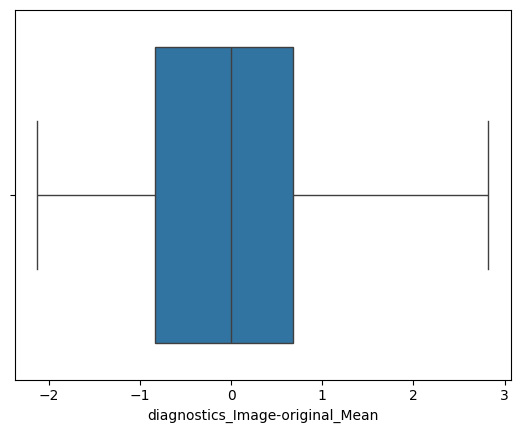

In [10]:
sns.boxplot(x=X_train['diagnostics_Image-original_Mean'])
plt.show()

### **Models**

In [7]:
dt_model, dt_score, dt_f1 = decision_tree(X_train, y_train, X_test, y_test)
rf_model, rf_score, rf_f1 = random_forest(X_train, y_train, X_test, y_test)
xgb_model, xgb_score, xgb_f1 = xgboost(X_train, y_train, X_test, y_test)
svm_model, svm_score, svm_f1 = svm(X_train, y_train, X_test, y_test)

# gbc_model, gbc_score, gbc_f1 = gradient_boosting(X_train, y_train, X_test, y_test)
# bst_bg_model, bg_score, bg_f1 = bagging(X_train, y_train, X_test, y_test, dt_model)

Fitting Decision Tree model...
Decision Tree Accuracy: 34.43%
Decision Tree F1 Score: 0.32
Fitting Random Forest model...
Random Forest Accuracy: 45.90%
Random Forest F1 Score: 0.43
Fitting XGBoost model...
XGBoost Accuracy: 40.98%
XGBoost F1 Score: 0.41
Fitting SVM model...
SVM Accuracy: 39.34%
SVM F1 Score: 0.33


#### Feature Importance

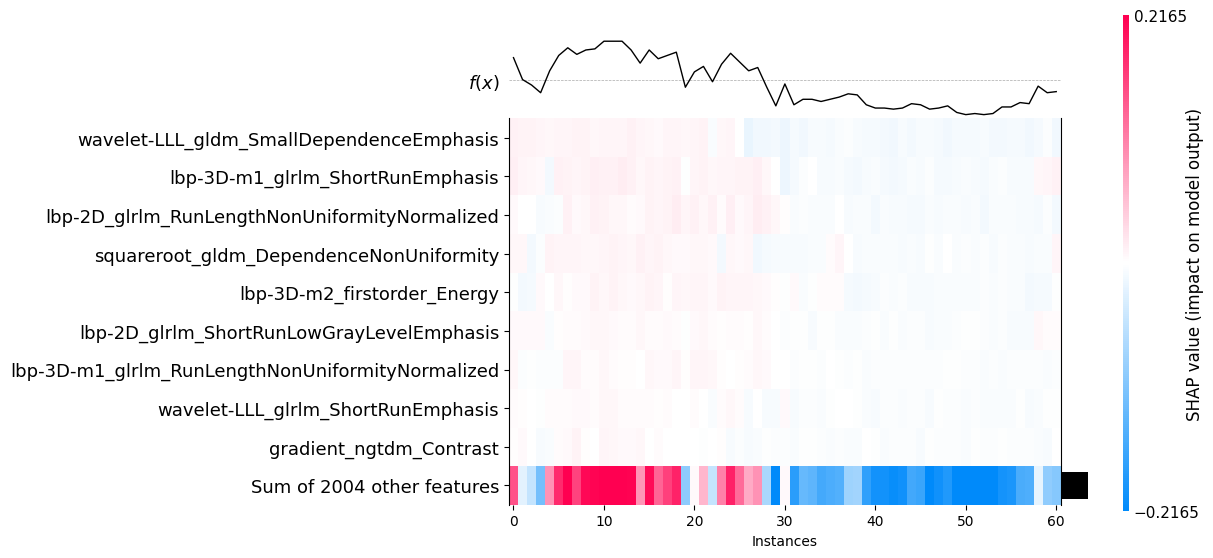

<Axes: xlabel='Instances'>

In [23]:
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)

shap.plots.heatmap(shap_values[:,:,1])

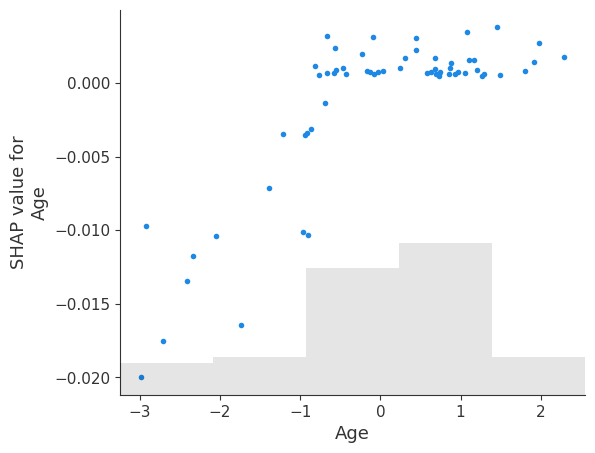

In [21]:
shap.plots.scatter(shap_values[:,'Age',1])

Training Random Forest model...
> Fitting...
> Evaluating model on test data...
- F1 Score: 0.41
> Fitting model on all training data...
Done.
dropped


KeyError: 'Class'

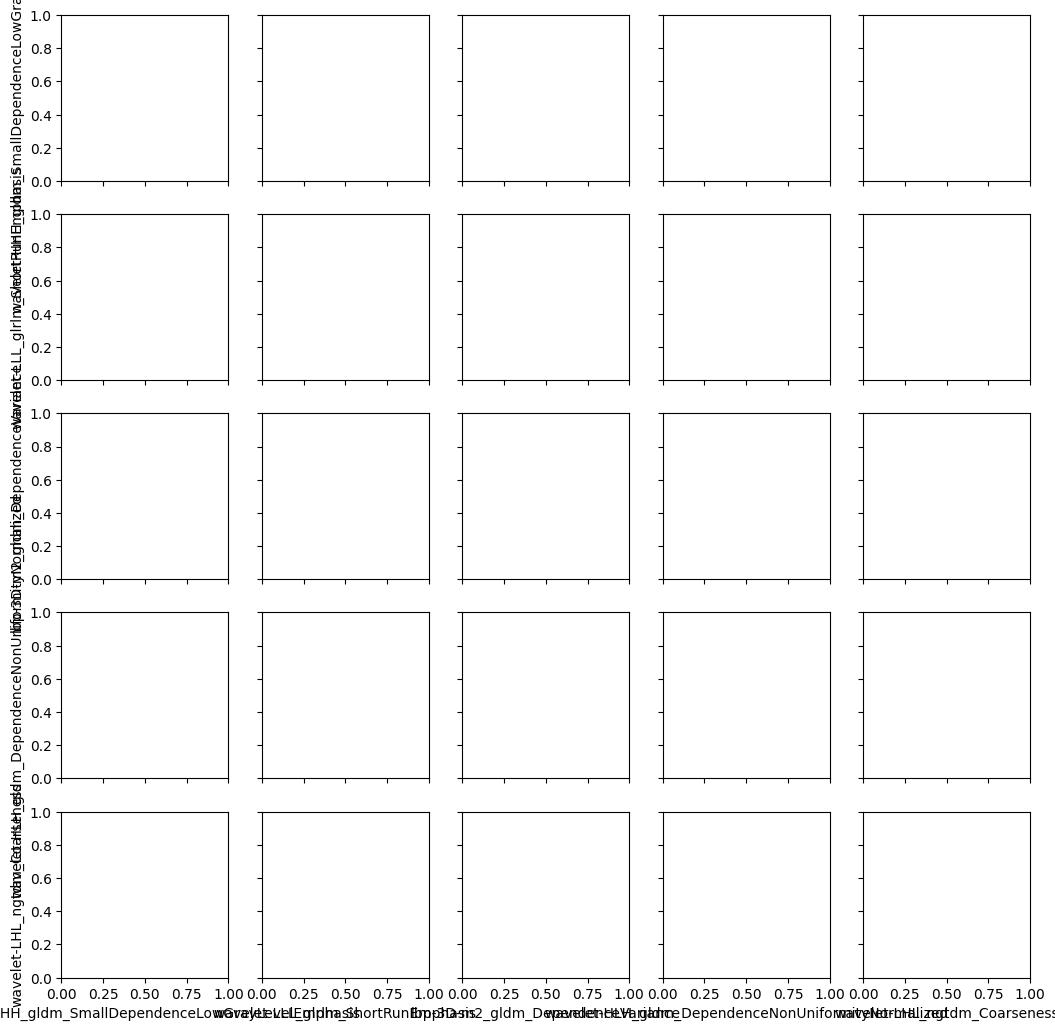

In [ ]:
X_train, X_test, y_train, y_test, le = preprocess(df_train)
X, y = preprocess(df_train, mode="all")

rf_model = RandomForestClassifier(criterion="gini", max_depth=8, max_features='sqrt', n_estimators=150, min_samples_leaf=1, min_samples_split=6, random_state=987654321, n_jobs=-1)
model, _ = train('Random Forest', rf_model, X_train,
                    y_train, X_test, y_test, X, y)

importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Create a list of tuples (feature name, importance)
feature_importances = list(zip(feature_names, importances))

# Sort by importance in descending order (optional)
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print the feature importances as a list of feature names (most important first)
ranked_features = [feature for feature, importance in feature_importances]

df = df_train[ranked_features[0:5]]
print("dropped")
sns.pairplot(df, hue="Transition")